In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from scipy.signal import wiener

# Step 1

In [8]:
K_hat = {} # Save the results
for dataset in ['A02', 'A07']:
    imgs = []
    denoised_imgs = []
    for img_nbr in range(1,16): # Loop over images
        image = io.imread(f"Dataset_Lab2/{dataset}_train/{dataset}_SDR_FLAT_{img_nbr:03d}.jpg")[:1024, :1024] # Read image and crop to the same size
        grayscale = color.rgb2gray(image)
        double_precision = img_as_float(grayscale)
        denoised_image = wiener(double_precision) # Apply wiener filter

        # Compute the residuals (difference between original and denoised image)
        residuals = double_precision - denoised_image

        imgs.append(double_precision)
        denoised_imgs.append(residuals)
    
    print(f'K hat value for dataset {dataset}:')
    K_hat[dataset] = sum([i*j for i,j in zip(imgs, denoised_imgs)]) / sum([i*i for i in imgs]) # Apply formula 3 to find the final PRNU estimate
    print(K_hat[dataset])

/Users/denisfedosov/Library/Caches/pypoetry/virtualenvs/df-p3ghjSHb-py3.12/lib/python3.12/site-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/Users/denisfedosov/Library/Caches/pypoetry/virtualenvs/df-p3ghjSHb-py3.12/lib/python3.12/site-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


K hat value for dataset A02:
[[ 2.50042450e-03  1.68718499e-03  1.68157852e-03 ...  1.46305636e-03
   1.46524773e-03  2.19762419e-03]
 [ 1.67694556e-03 -1.59084118e-04  1.55860260e-03 ... -5.05977352e-04
   6.89938470e-04  1.47251809e-03]
 [ 1.69183031e-03 -5.51389501e-03  5.48869505e-05 ...  1.58113702e-03
   8.30365886e-04  1.45884649e-03]
 ...
 [ 1.58827375e-03  1.02157656e-03 -3.51118489e-03 ... -1.65106289e-03
   1.37078253e-03  1.39017930e-03]
 [ 1.57903775e-03 -1.68207588e-03 -2.73690254e-03 ...  6.26521203e-04
  -1.28054336e-03  1.38836148e-03]
 [ 2.38252671e-03  1.58657287e-03  1.59450021e-03 ...  1.38240842e-03
   1.37717003e-03  2.07924932e-03]]
K hat value for dataset A07:
[[ 0.00223904  0.00150902  0.00151074 ...  0.00137153  0.00140179
   0.00208714]
 [ 0.00151369  0.00148432 -0.00192993 ...  0.00116034  0.00133174
   0.00138182]
 [ 0.00150537 -0.00341514  0.00326082 ...  0.0007478  -0.00297049
   0.00139442]
 ...
 [ 0.00154882 -0.00016046  0.0043007  ...  0.00385884  0.0

# Step 2

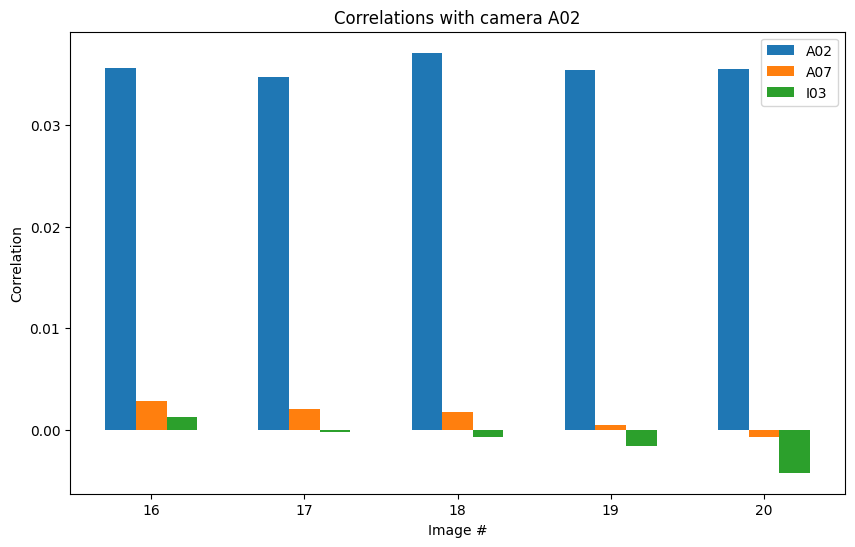

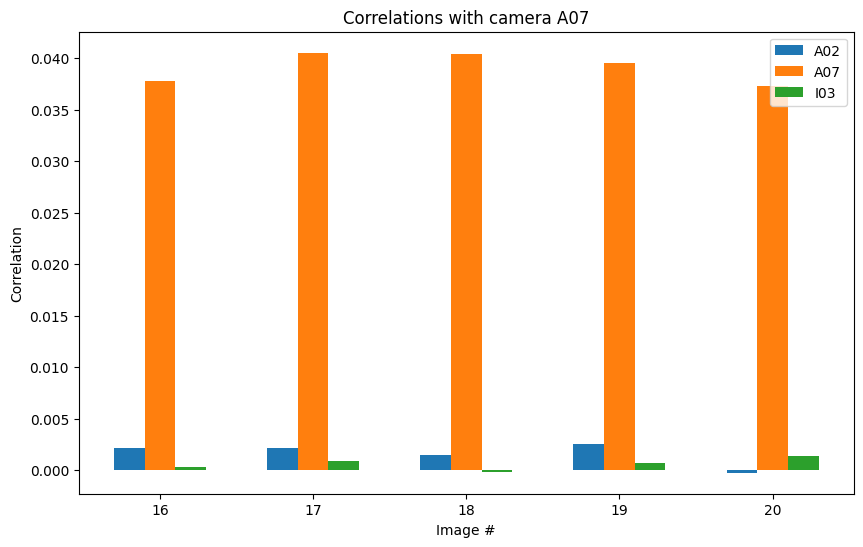

In [9]:
datasets = ['A02', 'A07', 'I03']
for test_dataset in datasets[:2]:
    correlations = [[],[],[]]
    
    for j,dataset in enumerate(datasets) :
        for i in range(16,21):
            image = io.imread(f"Dataset_Lab2/{dataset}_test/{dataset}_SDR_FLAT_{i:03d}.jpg")[:1024, :1024]
            grayscale = color.rgb2gray(image)
            double_precision = img_as_float(grayscale)
            denoised_image = wiener(double_precision)
            # Compute the residuals (difference between original and denoised image)
            residuals = double_precision - denoised_image

            # Compute correlation (formula 4)
            rho = np.corrcoef(residuals.flatten(), K_hat[test_dataset].flatten())[0, 1]
            correlations[j].append(rho)
        
    # Plot charts
    plt.figure(figsize=(10,6))

    for j in range(3):
        plt.bar(np.array(range(16,21)) + 0.2*(j-1), correlations[j], width=0.2, align='center', label=datasets[j])

    plt.title(f'Correlations with camera {test_dataset}')
    plt.xlabel('Image #')
    plt.ylabel('Correlation')
    plt.legend()
    plt.show()

# Conclusion

Photo-Response Non-Uniformity (PRNU) is a unique pattern introduced by imperfections in the imaging sensor of digital cameras. This pattern serves as a "fingerprint" that can be used to identify the source of an image. Denoising filters aim to reduce unwanted noise while preserving important details in the image.

As expected, in our results the correlation is high for the same camera. At the same time, correlation is near 0 with other camera and with images taken from the internet. We can conclude that the fingerprint of the camera has been correctly identified.